In [64]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix)
from imblearn.over_sampling import SMOTE



In [2]:
# Read train dataset
train_csv = pd.read_csv("/home/shinde/Documents/personal_projects/Machine_failure/playground-series-s3e17/train.csv")
train_csv.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


<ipython-input-7-e265d7e4db2b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method = "spearman")


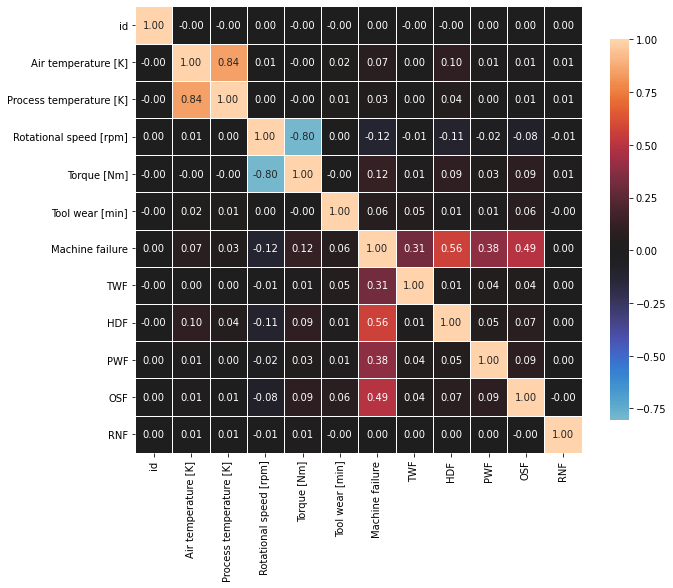

In [7]:
# Plot heatmap showing correlations between the features
def correlation_heatmap(df):
    correlations = df.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(train_csv)

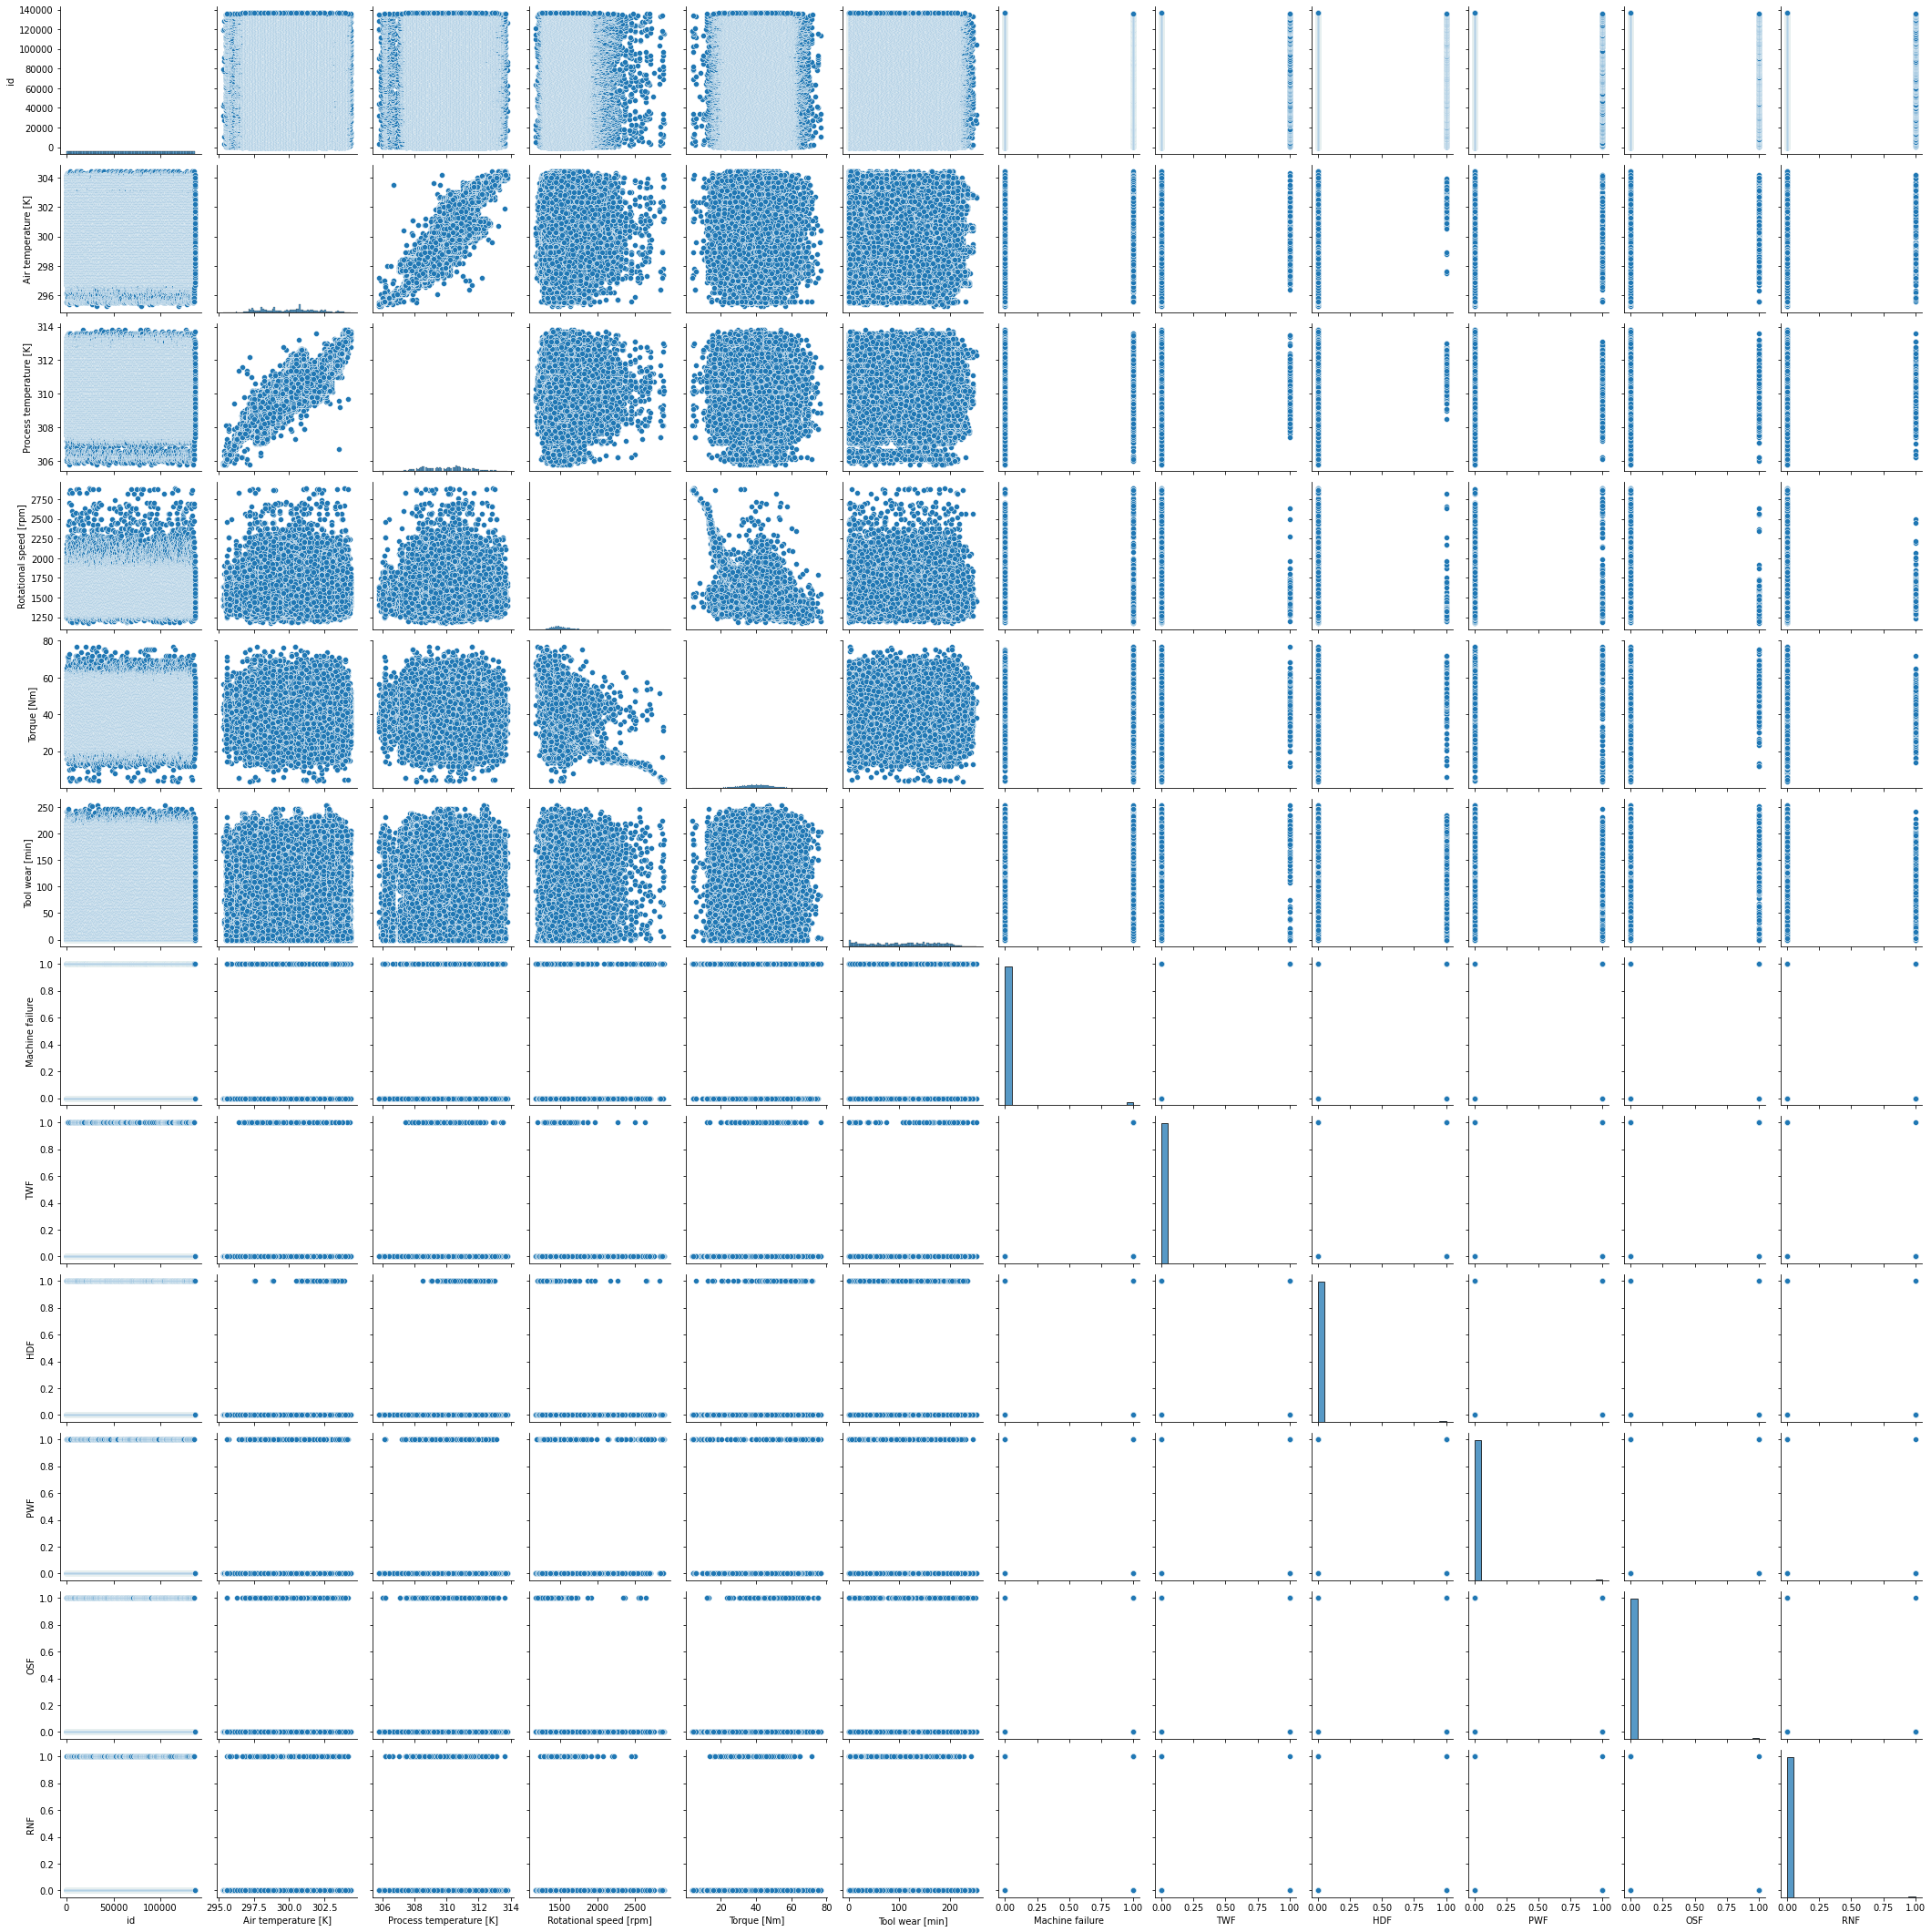

In [8]:
# Plot a pair plot to see the correlations
sns.pairplot(train_csv)

In [4]:
# drop ProdID & RNF (it has very low relation to Machine Failure)
df = train_csv.drop(['Product ID', 'RNF'], axis=1)

# create Power
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

# create tempdiff
df['TempDiff'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Fails aggregation
df['Fails'] = df['TWF'] + df['HDF'] + df['PWF'] + df['OSF']

# df = df.drop(["id"], axis = 1)
# df = df.drop(["Rotational speed [rpm]", "Torque [Nm]", "Process temperature [K]", "Air temperature [K]", "TWF", "HDF", "PWF", "OSF", 'id'], axis = 1)
# # one-hot encoding on Type
# b = pd.get_dummies(df['Type'], drop_first=True)
# df = df.drop(['Type'], axis=1)
# df = df.merge(b, on='id', how='right')



In [5]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,Power,TempDiff,Fails
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,60423.953944,10.078295,0.013069
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,9531.546208,0.984934,0.122033
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5829.600000,3.200000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54199.700000,9.300000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60258.000000,9.900000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66502.200000,11.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,152856.200000,15.000000,3.000000


<ipython-input-12-005c3a2ac230>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = Xtrain_tran.corr(method = "spearman")


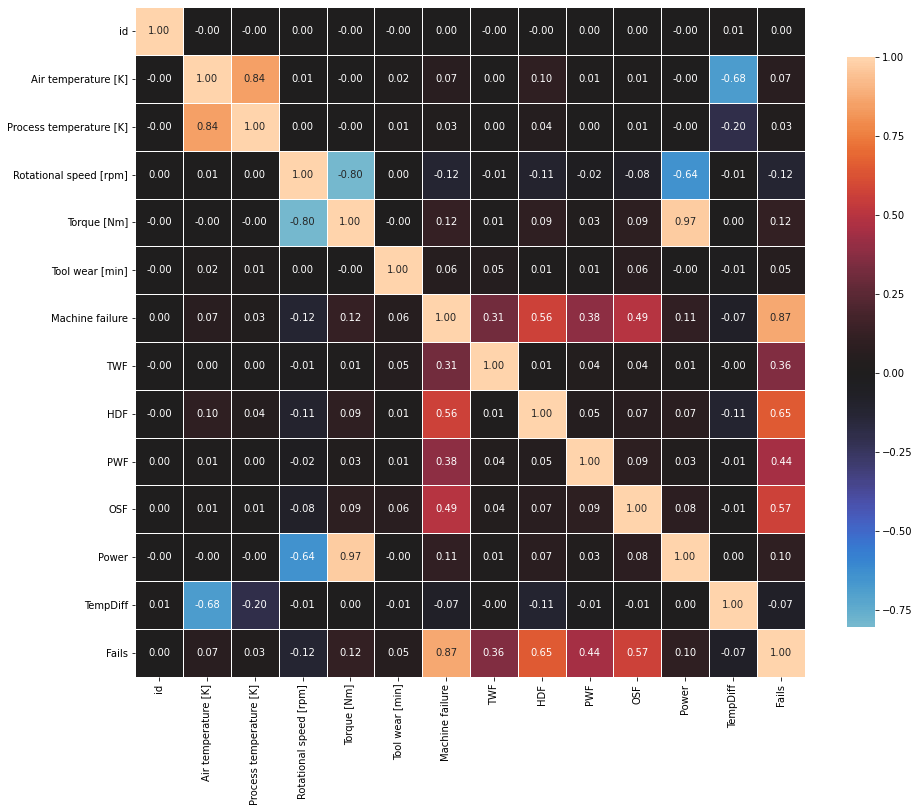

In [12]:
# Plot the heatmap again to check how well the new columns (like Tempdiff) relate to each other
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(df)


In [6]:
# Separate the input and target variables
y = df.pop('Machine failure')
X = df
X.head(10)


,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Power,TempDiff,Fails
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,57615.6,9.0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,51186.9,9.5,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,47832.5,9.2,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,67513.2,9.9,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,58091.4,11.0,0
5,5,M,298.4,308.9,1429,42.1,65,0,0,0,0,60160.9,10.5,0
6,6,L,299.6,311.0,1413,42.9,156,0,0,0,0,60617.7,11.4,0
7,7,L,298.7,310.1,1609,38.1,67,0,0,0,0,61302.9,11.4,0
8,8,L,297.7,308.8,1578,35.2,13,0,0,0,0,55545.6,11.1,0
9,9,L,300.5,312.3,1447,53.3,98,0,0,0,0,77125.1,11.8,0


In [7]:
# Split data to train and test

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [8]:
Xtrain.shape, ytrain.shape, yval.shape, Xval.shape

((109143, 14), (109143,), (27286,), (27286, 14))

In [9]:
Xtrain.columns

Index(['id', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Power', 'TempDiff', 'Fails'],
      dtype='object')

# Feature Engineering

In [28]:
# Store all the fe components 
fe1 = ColumnTransformer([
    ("ohe_type", OneHotEncoder(sparse=False), ["Type"]),
    ("scale_torque", StandardScaler(), ["Torque [Nm]"]),
], remainder = 'passthrough')

fe1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_type', OneHotEncoder(sparse=False),
                                 ['Type']),
                                ('scale_torque', StandardScaler(),
                                 ['Torque [Nm]'])])

In [29]:
# fit the column transformer on the training data
fe1.fit(Xtrain)

/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_type', OneHotEncoder(sparse=False),
                                 ['Type']),
                                ('scale_torque', StandardScaler(),
                                 ['Torque [Nm]'])])

In [30]:
# transform the training data
Xtrain_tran = fe1.transform(Xtrain)
Xtrain_tran = pd.DataFrame(Xtrain_tran, columns=fe1.get_feature_names_out())
Xtrain_tran

,ohe_type__Type_H,ohe_type__Type_L,ohe_type__Type_M,scale_torque__Torque [Nm],remainder__id,remainder__Air temperature [K],remainder__Process temperature [K],remainder__Rotational speed [rpm],remainder__Tool wear [min],remainder__TWF,remainder__HDF,remainder__PWF,remainder__OSF,remainder__Power,remainder__TempDiff,remainder__Fails
0,0.0,1.0,0.0,-0.265151,25585.0,299.1,310.4,1502.0,188.0,0.0,0.0,0.0,0.0,57226.2,11.3,0.0
1,0.0,1.0,0.0,-1.217514,77636.0,298.2,307.8,1689.0,60.0,0.0,0.0,0.0,0.0,50670.0,9.6,0.0
2,0.0,0.0,1.0,-0.805999,75037.0,298.0,307.6,1579.0,150.0,0.0,0.0,0.0,0.0,52896.5,9.6,0.0
3,0.0,0.0,1.0,0.557878,105029.0,298.5,309.4,1443.0,85.0,0.0,0.0,0.0,0.0,65079.3,10.9,0.0
4,0.0,0.0,1.0,0.569636,11624.0,300.0,309.1,1435.0,152.0,0.0,0.0,0.0,0.0,64862.0,9.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109138,0.0,1.0,0.0,0.122848,121353.0,299.2,308.7,1511.0,78.0,0.0,0.0,0.0,0.0,62555.4,9.5,0.0
109139,0.0,1.0,0.0,-1.299817,55546.0,298.1,309.0,1557.0,2.0,0.0,0.0,0.0,0.0,45620.1,10.9,0.0
109140,1.0,0.0,0.0,1.075211,17780.0,301.6,310.6,1400.0,166.0,0.0,0.0,0.0,0.0,69300.0,9.0,0.0
109141,0.0,1.0,0.0,0.840060,123867.0,297.8,307.9,1440.0,23.0,0.0,0.0,0.0,0.0,68400.0,10.1,0.0


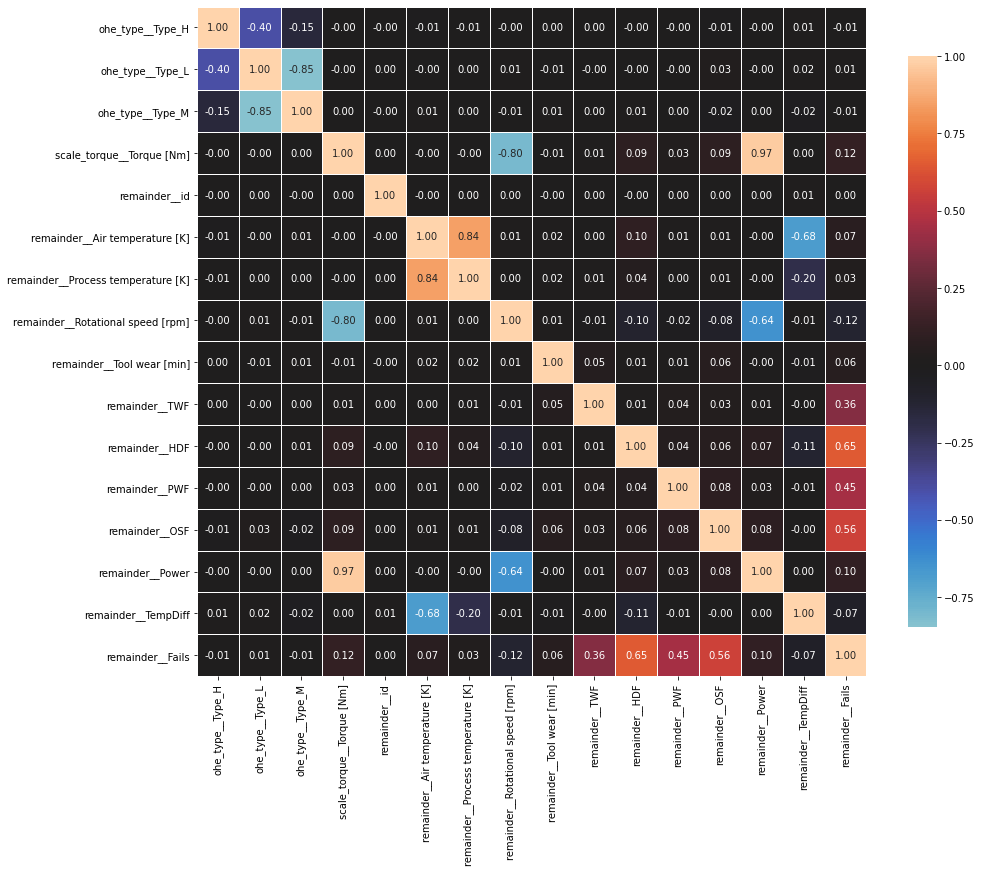

In [31]:
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(Xtrain_tran)


In [32]:
# Drop ohe_type__Type_M as ohe_type__Type_L works really well
Xtrain_tran = Xtrain_tran.drop(['ohe_type__Type_M'], axis=1)

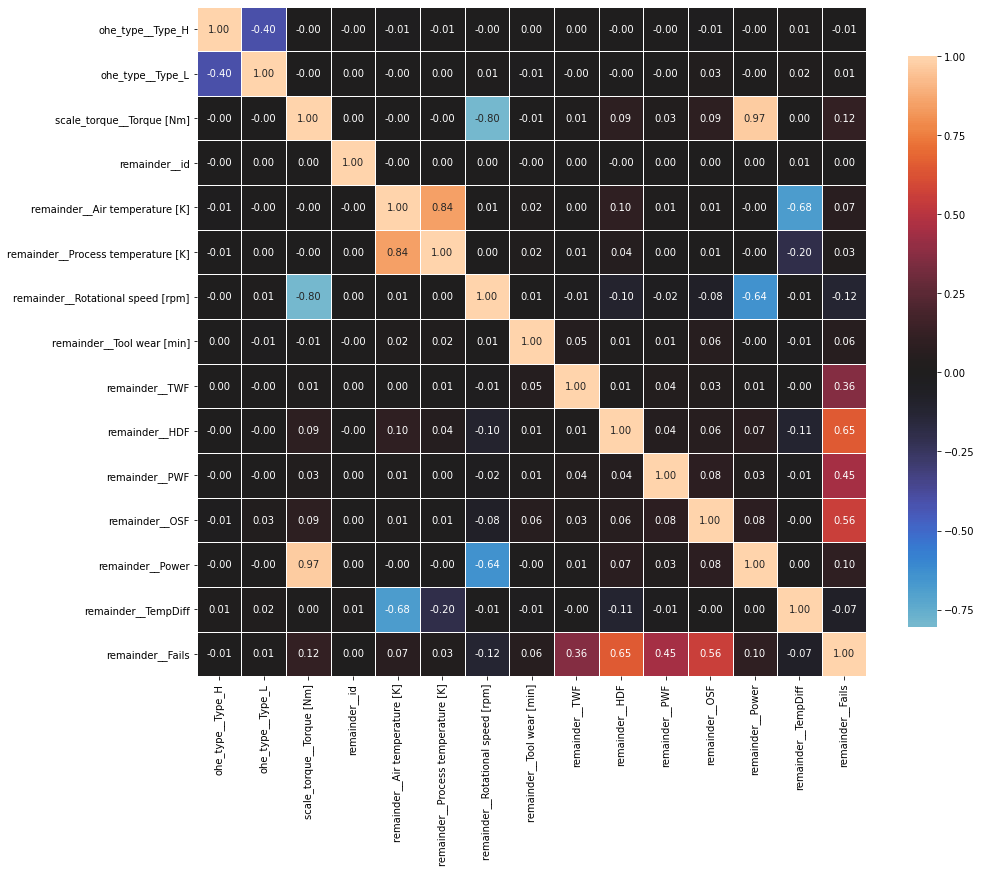

In [33]:
def correlation_heatmap(Xtrain_tran):
    correlations = Xtrain_tran.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(Xtrain_tran)

In [34]:
# Transform validation set
Xval_tran = fe1.transform(Xval)
Xval_tran = pd.DataFrame(Xval_tran, columns=fe1.get_feature_names_out())
Xval_tran = Xval_tran.drop(['ohe_type__Type_M'], axis=1)


# Balancing the data with SMOTE

In [35]:
sm=SMOTE(sampling_strategy="minority")

X_os,y_os=sm.fit_resample(Xtrain_tran,ytrain)
Xval_os,yval_os=sm.fit_resample(Xval_tran,yval)


In [36]:
Xtrain_tran.columns

Index(['ohe_type__Type_H', 'ohe_type__Type_L', 'scale_torque__Torque [Nm]',
       'remainder__id', 'remainder__Air temperature [K]',
       'remainder__Process temperature [K]',
       'remainder__Rotational speed [rpm]', 'remainder__Tool wear [min]',
       'remainder__TWF', 'remainder__HDF', 'remainder__PWF', 'remainder__OSF',
       'remainder__Power', 'remainder__TempDiff', 'remainder__Fails'],
      dtype='object')

In [54]:
X_os = X_os.rename(columns={"scale_torque__Torque [Nm]": "scale_torque__Torque", 
                                          "scale_tool__Tool wear [min]": "scale_tool__Tool wear",
                                          "scale_temp__Air temperature [K]":"scale_temp__Air temperature",
                                          "remainder__Process temperature [K]": "remainder__Process temperature",
                                          "remainder__Rotational speed [rpm]":"remainder__Rotational speed",
                                          "remainder__Air temperature [K]" : "remainder__Air temperature",
                                          "remainder__Torque [Nm]" : "remainder__Torque",
                                          "remainder__Tool wear [min]":"remainder__Tool wear"
                                          })

Xval_os = Xval_os.rename(columns={"scale_torque__Torque [Nm]": "scale_torque__Torque", 
                                          "scale_tool__Tool wear [min]": "scale_tool__Tool wear",
                                          "scale_temp__Air temperature [K]":"scale_temp__Air temperature",
                                          "remainder__Process temperature [K]": "remainder__Process temperature",
                                          "remainder__Rotational speed [rpm]":"remainder__Rotational speed",
                                          "remainder__Air temperature [K]" : "remainder__Air temperature",
                                          "remainder__Torque [Nm]" : "remainder__Torque",
                                          "remainder__Tool wear [min]":"remainder__Tool wear"
                                          })

In [42]:
# LightGBM

In [43]:
X_os.columns

Index(['ohe_type__Type_H', 'ohe_type__Type_L', 'scale_torque__Torque',
       'remainder__id', 'remainder__Air temperature',
       'remainder__Process temperature', 'remainder__Rotational speed',
       'remainder__Tool wear', 'remainder__TWF', 'remainder__HDF',
       'remainder__PWF', 'remainder__OSF', 'remainder__Power',
       'remainder__TempDiff', 'remainder__Fails'],
      dtype='object')

In [44]:
import lightgbm as lgb
d_train = lgb.Dataset(X_os,  label=y_os)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 100
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 107425, number of negative: 107425
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 214850, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


### Predictions for train set

In [55]:
y_pred=clf.predict(X_os)

#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [56]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_os, y_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_os)

In [57]:
# Print confusion matrix
cm

array([[107323,    102],
       [  5267, 102158]])

In [58]:
# Print Accuracy
accuracy

0.9750104724226204

### Predictions for val set

In [59]:
y_val_pred=clf.predict(Xval_os)

#convert into binary values
for i in range(0, len(y_val_pred)):
    if y_val_pred[i]>=.5:       # setting threshold to .5
        y_val_pred[i]=1
    else:  
        y_val_pred[i]=0

In [61]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yval_os, y_val_pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_val_pred,yval_os)

In [62]:
cm 

array([[26825,    31],
       [ 1529, 25327]])

In [63]:
accuracy

0.9709562109025917

In [49]:
# Apply model on the test.csv
# Read test csv

test_csv = pd.read_csv("/home/shinde/Documents/personal_projects/Machine_failure/playground-series-s3e17/test.csv")

test_csv.head(10)

# drop ProdID i RNF
test_csv = test_csv.drop(['Product ID', 'RNF'], axis=1)

# create Power
test_csv['Power'] = test_csv['Rotational speed [rpm]'] * test_csv['Torque [Nm]']

# create tempdiff
test_csv['TempDiff'] = test_csv['Process temperature [K]'] - test_csv['Air temperature [K]']

# Fails aggregation
test_csv['Fails'] = test_csv['TWF'] + test_csv['HDF'] + test_csv['PWF'] + test_csv['OSF']

# test_csv = test_csv.drop(["Rotational speed [rpm]", "Torque [Nm]", "Process temperature [K]", "Air temperature [K]", "TWF", "HDF", "PWF", "OSF",'id'], axis = 1)

# # # transform the test data
test_tran = fe1.transform(test_csv)
test_tran_df = pd.DataFrame(test_tran, columns=fe1.get_feature_names_out())
test_tran_df = test_tran_df.drop(['ohe_type__Type_L'], axis=1)

In [50]:
prob_clf = pd.DataFrame(clf.predict(test_tran_df), columns = ["Machine failure"])

In [51]:
submission_clf = pd.concat([test_csv["id"], prob_clf], axis = 1)
submission_clf.to_csv("submissions_predicted_xg_smote_clf_fe1.csv")